In [4]:
import os
import chardet

def convert_to_utf8(directory):
    # 遍历指定目录下的所有文件
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):  # 只处理 .txt 文件
            filepath = os.path.join(directory, filename)
            
            # 读取文件内容，并检测编码
            with open(filepath, 'rb') as file:
                raw_data = file.read()
                encoding = chardet.detect(raw_data)['encoding']

            # 如果文件不是 UTF-8 编码，则转换它
            if encoding != 'utf-8':
                try:
                    # 解码旧编码并重新编码为 UTF-8
                    decoded_data = raw_data.decode(encoding)
                    utf8_data = decoded_data.encode('utf-8')

                    # 将转换后的数据写回文件
                    with open(filepath, 'wb') as file:
                        file.write(utf8_data)
                    print(f"Converted {filename} to UTF-8.")
                except UnicodeDecodeError:
                    print(f"Error converting {filename}. Skipping.")

# 调用函数，指定要处理的目录
convert_to_utf8('fr')


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_directory'

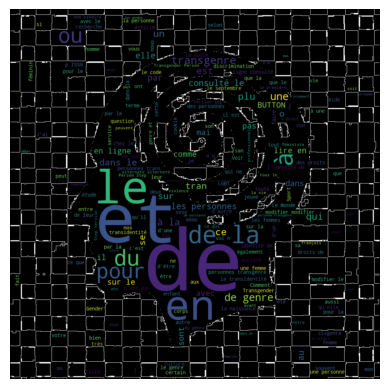

In [3]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load text
text = open('./../images/merged_fr.txt', 'r').read()

# Load the silhouette image
mask_image = np.array(Image.open('./../images/shape.png'))

# Create the word cloud object, set parameters for shape, size, and color
wc = WordCloud(background_color='black', mask=mask_image, contour_width=1, contour_color='white')

# Generate the word cloud
wc.generate(text)

# Display the word cloud using matplotlib
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save to a file
wc.to_file('output_name.png')
